## <div align="center">AF7. Kalman Filter  </div>

# Introduction
In this assignment Kalman Filter was implemented on a raw data and prediction of KF would be avaluated.
Moreover, I want to apply Least Means Square to the same data and **compare the outputs of KF and LMS**.

Table of contents:
1. Kalman Filter
2. Tweak hyperparameters KF
3. Apply hyperparameters
4. LMS
5. Tweak hyperparameters LMS
6. KF vs LMS
7. Conclsuion

## <div align="center">Section 1. Kalman Filter</div>

Kalman Filter(KF) is an optimal mathematical algorithm used to estimate the state of a system based on noisy measurements.

KF is used for the solving the following problems:
- Tracking the position of an object in real-time based on noisy measurements from sensors such as GPS, accelerometers, and gyroscopes.
- Estimating the state of a dynamic system, such as an aircraft or a car, based on noisy sensor measurements and a mathematical model of the system's behavior.
- Filtering noisy sensor data to extract a signal of interest, such as filtering out noise from a speech signal to improve speech recognition accuracy.

The general idea how KF is working. It uses a prediction step to estimate the next state based on the current state estimate and the system model, and an update step to incorporate measurements and adjust the state estimate based on the measured values. The filter also estimates the uncertainty in the state estimate and uses this information to weight the predictions and measurements appropriately.

In [56]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [57]:
# Define the function for activating Kalman Filter
def kalman_filter(data, Q, R, P0):
    
    # Initialize the Kalman Filter variables
    x_hat = np.zeros_like(data)  # Filtered position data
    P = np.zeros_like(data)  # Error covariance
    K = np.zeros_like(data)  # Kalman gain
    x_hat[0] = data[0]
    P[0] = P0
    
    # Implement the Kalman Filter
    for i in range(1, len(data)):
        # Prediction step
        x_hat[i] = x_hat[i-1]
        P[i] = P[i-1] + Q
    
        # Update step
        K[i] = P[i] / (P[i] + R)
        x_hat[i] = x_hat[i] + K[i] * (data[i] - x_hat[i])
        P[i] = (1 - K[i]) * P[i]
    
    return x_hat, data

#### Function that plot graphs for KF

In [58]:
# This function will help to plot the data multiple times
def plot_data(data, x_hat):
    
    # Plot the original and filtered data
    t = np.arange(len(data))
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,10), gridspec_kw={'height_ratios': [0.6, 0.4]})
    
    axs[0].plot(t, data, label='Original Data')
    axs[0].plot(t, x_hat, label='Kalman Filter Output')
    axs[0].set_title("Kalman Filter", fontsize=20)
    axs[0].set_xlabel('Time', fontsize=15)
    axs[0].set_ylabel('Position', fontsize=15)
    axs[0].legend(fontsize=15)
    axs[0].grid(True)
    
    axs[1].set_title("Kalman Filter Zoom In", fontsize=20)
    axs[1].plot(t[:200], data[:200], label='Original Data')
    axs[1].plot(t[:200], x_hat[:200], label='Kalman Filter Output')
    axs[1].set_xlabel('Time', fontsize=15)
    axs[1].set_ylabel('Position', fontsize=15)
    axs[1].legend(fontsize=15)
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()


#### Function that plot graphs for LMS

In [59]:
def plot_data_lms(data, y):
    
    # Plot the original and filtered data
    t = np.arange(len(data))
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,10), gridspec_kw={'height_ratios': [0.6, 0.4]})
    
    axs[0].plot(t, data, 'b-', label='Measured position')
    axs[0].plot(t, y, 'r-', label='LMS')
    axs[0].set_xlabel('Time', fontsize=15)
    axs[0].set_ylabel('Position', fontsize=15)
    axs[0].set_title("LMS", fontsize=20)
    axs[0].legend(fontsize=15)
    axs[0].grid(True)
    
    axs[1].set_title("LMS Zoom In", fontsize=20)
    axs[1].plot(t[:200], data[:200], 'b-', label='Measured position')
    axs[1].plot(t[:200], y[:200], 'r-', label='LMS')
    axs[1].set_xlabel('Time', fontsize=15)
    axs[1].set_ylabel('Position', fontsize=15)
    axs[1].legend(fontsize=15)
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()


Implementation of KF, plotting the graphs and show the Errors.

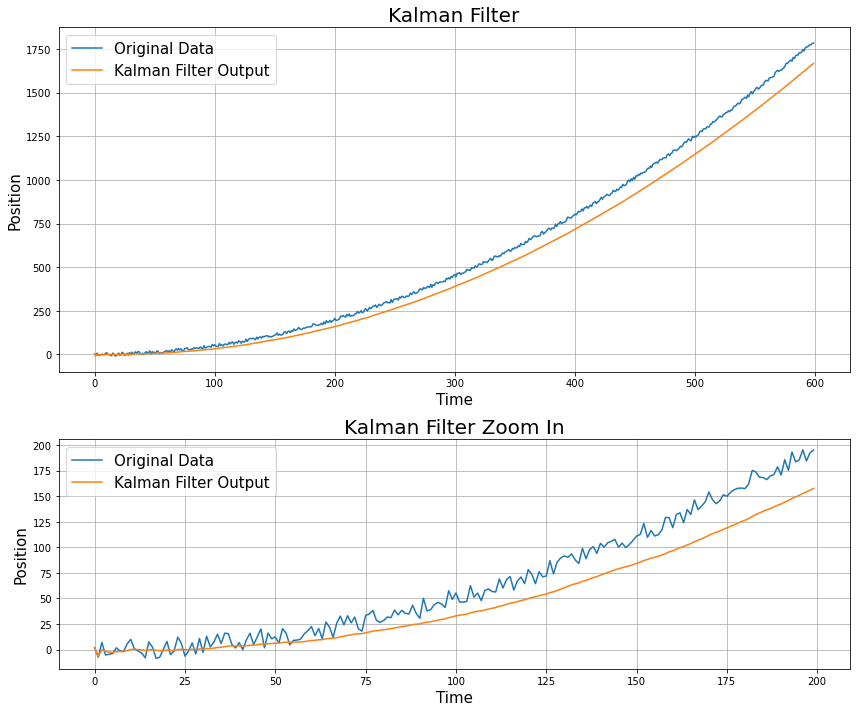


RMSE: 71.6617654839002
MAE: 60.991431558327534


In [60]:
# Assign parameters
Q = 1e-3  # Process noise variance HERE
R = 0.5  # Measurement noise variance
P0 = 5 

# Load the data
data = np.array(pd.read_excel('KF_Assignment_1_data.xlsx', usecols=['Measured position data'])['Measured position data'][0:600])

# Run the KF
x_hat, data = kalman_filter(data, Q, R, P0)

plot_data(data, x_hat)

# Calculate RMSE and MAE
rmse = np.sqrt(np.mean((data - x_hat)**2))
mae = np.mean(np.abs(data - x_hat))

# Print the results
print("")
print("RMSE:", rmse)
print("MAE:", mae)

## <div align="center">Section 2. Tweak hyperparameters</div>

### GridSearch

One of the most inportant aspects of applying filters is to define the most efficient parameters, that will perform the best performance of a filter. Thus, in the following senction I will iterate over the set of parameters and figure out what set of parameters has the smallest RMSE, and this would be my top set of parameters for the finale version of KF.

In [61]:
import itertools # This library helps me to iterate

# Define the ranges of hyperparameters to explore
Q_list = [1e-4, 1e-3, 1e-2, 1e-1]
R_list = [0.01, 0.05, 0.1, 0.5]
P0_list = [0.1, 1, 10, 100]

# Create a list of all possible combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(Q_list, R_list, P0_list))

# Initialize variables to store the best hyperparameters and corresponding RMSE
best_hyperparameters = None
best_rmse = float('inf')

# Loop through all hyperparameter combinations and calculate RMSE
for Q, R, P0 in hyperparameter_combinations:
    # Initialize the Kalman Filter variables
    x_hat = np.zeros_like(data)  # Filtered position data
    P = np.zeros_like(data)  # Error covariance
    K = np.zeros_like(data)  # Kalman gain
    x_hat[0] = data[0]
    P[0] = P0
    
    # Implement the Kalman Filter
    for i in range(1, len(data)):
        # Prediction step
        x_hat[i] = x_hat[i-1]
        P[i] = P[i-1] + Q

        # Update step
        K[i] = P[i] / (P[i] + R)
        x_hat[i] = x_hat[i] + K[i] * (data[i] - x_hat[i])
        P[i] = (1 - K[i]) * P[i]
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((data - x_hat)**2))
    if rmse < best_rmse:
        best_rmse = rmse
        best_hyperparameters = (Q, R, P0)

# Print the best hyperparameters and corresponding RMSE
print("Best hyperparameters:", best_hyperparameters)
print("Corresponding RMSE:", best_rmse)



Best hyperparameters: (0.1, 0.01, 1)
Corresponding RMSE: 0.732899775210399


## <div align="center">Section 3. Apply hyperparameters</div>

Now I know the best hyperparameters and can check the performance of KF with new parameters.

#### Here I measure the execution time for KF.

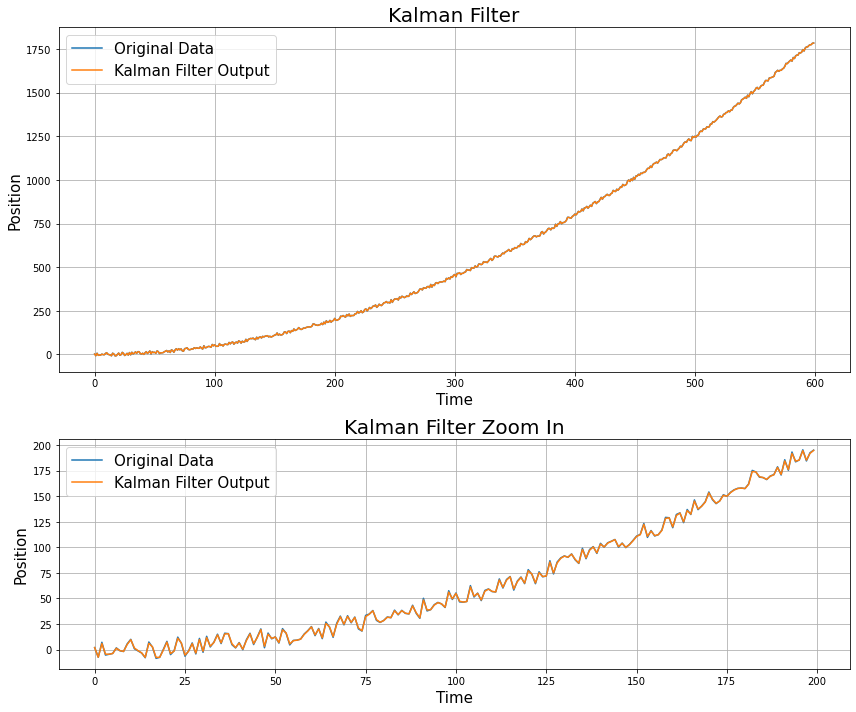


RMSE for Kalman Filter: 0.732899775210399
MAE for Kalman Filter: 0.6023244642017495


In [62]:
Q = 0.1
R = 0.01
P0 = 1

# data = np.array(pd.read_excel('KF_Assignment_1_data.xlsx', usecols=['Measured position data'])['Measured position data'][0:300])

start_time_KF = time.time() # Start timer to measure execution time

x_hat, data = kalman_filter(data, Q, R, P0)

end_time_KF = time.time() # Save the end time
execution_time_KF = end_time_KF - start_time_KF # Find the execution time

plot_data(data, x_hat)

# Calculate RMSE and MAE
rmse_KM = np.sqrt(np.mean((data - x_hat)**2))
mae_KM = np.mean(np.abs(data - x_hat))

# Print the results
print("")
print("RMSE for Kalman Filter:", rmse_KM)
print("MAE for Kalman Filter:", mae_KM)


### Summery of the chapters

The graph shows that the output of KF is almost identical to the inital data, however, the patter of the graph looks bumpy, therefore, I will make the output of KF smoother. 

Smoothing a signal means reducing the high-frequency noise in the signal to make the underlying trends or patterns more visible. A Savitzky-Golay filter is a type of digital signal processing filter that is commonly used for smoothing data.

The Savitzky-Golay filter works by fitting a low-degree polynomial to a window of neighboring samples and using the coefficients of the polynomial to smooth the signal. The window size and polynomial degree are adjustable parameters that affect the level of smoothing applied to the data.

Recent technology allows me to implement **Savitzky-Golay filter** just by using 3 lines of code from the **scipy.signal module**. 


The savgol_filter() function from the scipy.signal module applies a Savitzky-Golay filter to a one-dimensional array of data. The window_length argument specifies the length of the window used for smoothing, while the polyorder argument specifies the degree of the polynomial used for fitting the samples.

By using savgol_filter() I can reduce any high-frequency noise in the signal and obtain a smoother curve.

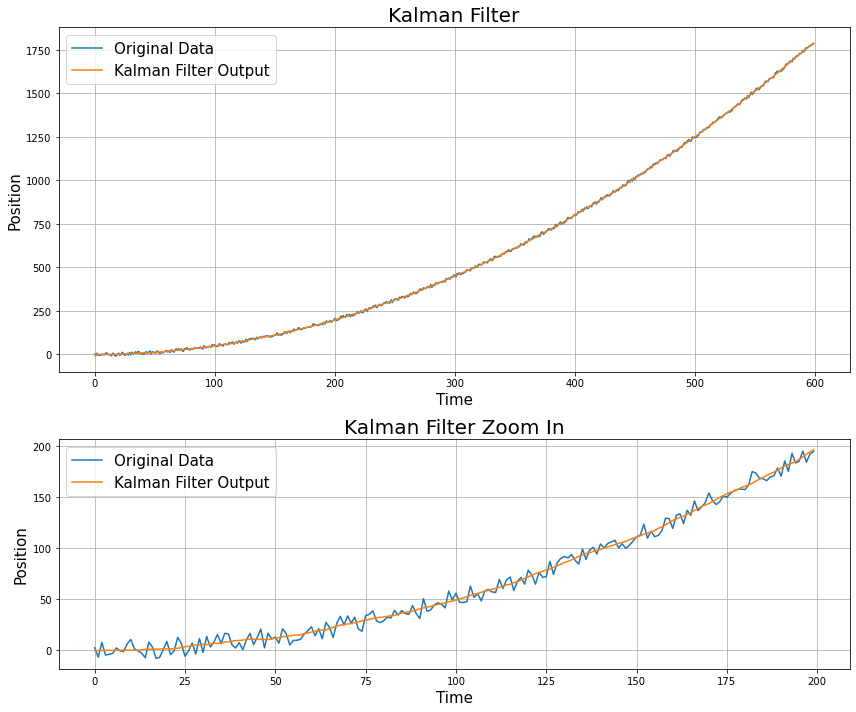

In [63]:
from scipy.signal import savgol_filter

# Smooth the data using Savitzky-Golay filter
window_length = 21  # Window length of the filter
polyorder = 1  # Order of the polynomial used to fit the samples
x_hat_smooth_KM = savgol_filter(x_hat, window_length, polyorder)

# Plot the smoothed data
plot_data(data, x_hat_smooth_KM)

The output looks much more representative and clear.

## <div align="center">Section 4. LMS.  </div>

In this section I want to apply LMS algorith to the same data and in the end compare the performance of LMS and KF.

I found the nice article that applies LMS to predict STOCK data. The solution was applied for my problem and it performce as expected.

https://towardsdatascience.com/adaptive-filtering-in-stock-market-prediction-2db9ad7ae7f9

<img src="LMS.png" alt="Alt text" width="500" height="300" align="center">

The variables are defined as follows:
- x: The input signal, which is a one-dimensional array of length M.
- l: The length of the filter. The filter is a vector with a length of N+1, where N is the filter order.
- u: The step size or learning rate of the LMS algorithm, which determines the speed of convergence.
- N: The filter order or tap length, which determines the number of filter coefficients or taps.

In [64]:
# Set up LMS algorithm 
def lmsPred(x,l,u,N):
    xd= np.block([np.zeros((1,l)), x]).T
    y=np.zeros((len(xd),1))
    xn=np.zeros((N+1,1))
    xn = np.matrix(xn)
    wn=np.random.rand(N+1,1)/10
    M=len(xd)
    for n in range(0,M):
        xn = np.block([[xd[n]], [xn[0:N]]])
        y[n]= np.matmul(wn.T, xn)
        if(n>M-l-1):
            e =0
        else:
            e=int(x[n]-y[n])
#             e=(x[n]-y[n])
        wn = wn + 2*u*e*xn
        
    return y,wn

### Lets run the algorithm

I did some experiments and figured out approximate values for the parameters of LMS.
I will use these parameters for the first test output here.

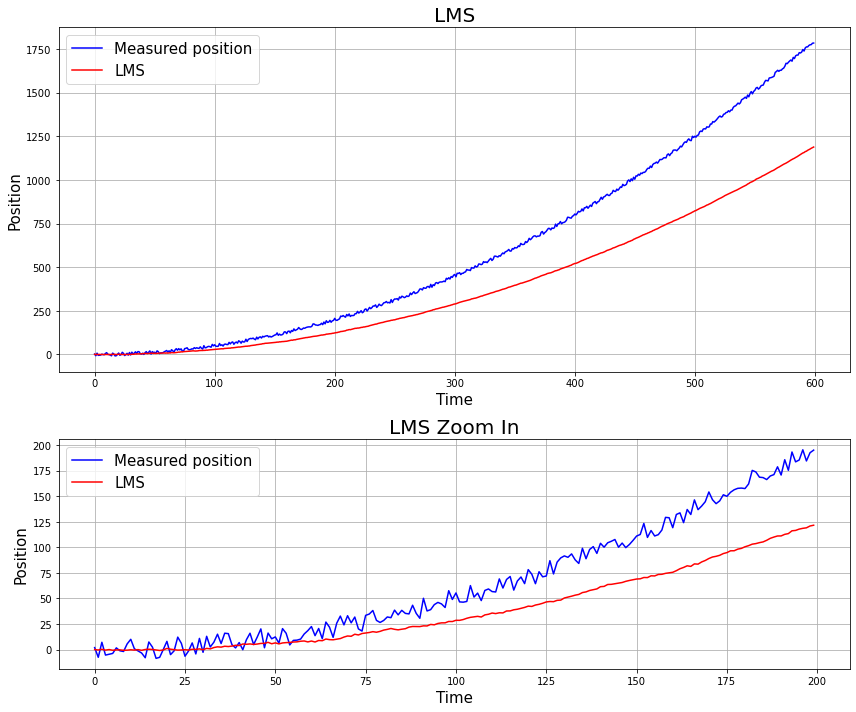

In [126]:
# data = np.array(pd.read_excel('KF_Assignment_1_data.xlsx', usecols=['Measured position data'])['Measured position data'])
x_train = data # Data set
u = 2**(-40) # Learning rate
l = 0 # The length of the filter.  
N = 15 # Filter order
y,wn = lmsPred(x_train,l,u,N)

y = y.reshape(600,)
plot_data_lms(data, y)

In [127]:
# Calculate RMSE and MAE
rmse_LMS_1 = np.sqrt(np.mean((x_train - y)**2))
mae_LMS_1 = np.mean(np.abs(x_train - y))

# Print the results
print("")
print("RMSE for LMS:", rmse_LMS_1)
print("MAE for LMS:", mae_LMS_1)


RMSE for LMS: 275.82379024895647
MAE for LMS: 208.32285484369436


I will apply **Savitzky-Golay filter** to smoother the output of LMS. It is the same function as I used before for smoothering Kalman Filter.

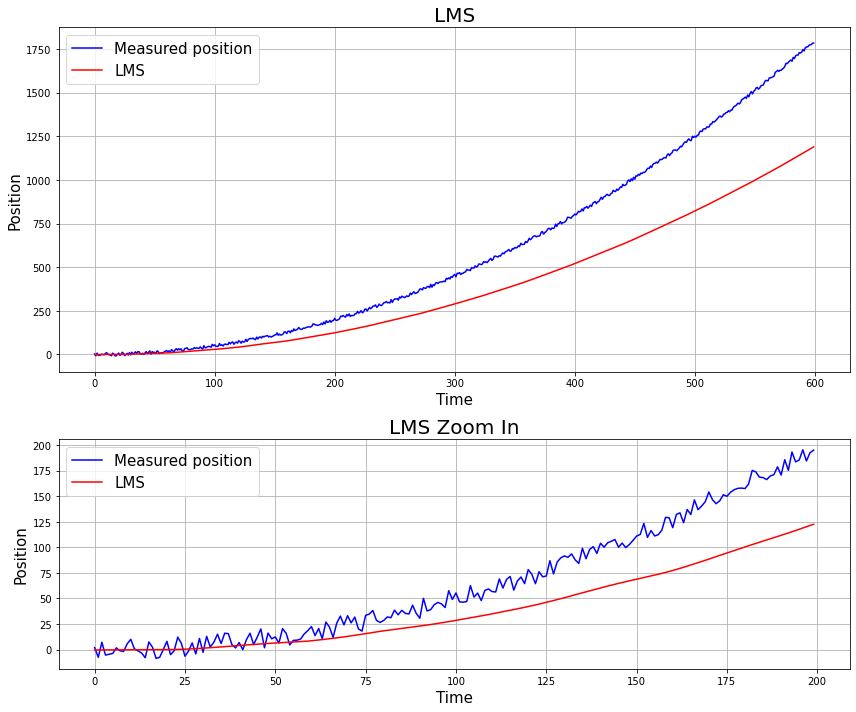

In [128]:
# Smooth the data using Savitzky-Golay filter
window_length = 21  # Window length of the filter
polyorder = 1  # Order of the polynomial used to fit the samples
x_hat_smooth_LMS = savgol_filter(y, window_length, polyorder)

# Plot the smoothed data
plot_data_lms(data, x_hat_smooth_LMS)

## Conclusion
Best on the performance of the LMS I have noticed several observations:
- It is not stable. The same set of parameters every iteration return different output.
- The error looks higher comparing to Kalman Filter

## <div align="center">Section 5. Tweak hyperparameters for LMS </div>

In the following chapter I will iterate over the specific set of parameters. My goal is to find the parameters that would have the lower error.
The one with lower value would be my option for the comparison with the Kalman Filter.

In [68]:
from sklearn.metrics import mean_squared_error

def find_best_parameters(data):
    # Define the ranges for the parameters
    start = -45
    stop = -35
    step_size = 0.05
    num = int((stop - start) / step_size) + 1
    u_range = np.logspace(-45, -35, num=num, base=3)
    
    l_range = range(0, 4, 1)
    N_range = range(0, 22, 2)

    # Initialize the best parameters and minimum MSE
    best_l, best_u, best_N = None, None, None
    min_mse = float('inf')

    # Loop over all parameter combinations
    for l in l_range:
        for u in u_range:
            for N in N_range:
                # Run the LMS algorithm with the current parameters
                k = 600 - l
                x_train = data[:k]
                y_pred, wn = lmsPred(x_train, l, u, N)
                y_pred = y_pred.reshape(600,)

                # Calculate the MSE between the predicted and actual values
                mse = mean_squared_error(data, y_pred)

                # Update the best parameters if the current MSE is lower
                if mse < min_mse:
                    best_l, best_u, best_N = l, u, N
                    min_mse = mse

    # Return the best parameters and minimum MSE
    return best_l, best_u, best_N, min_mse


In [69]:
# best_l, best_u, best_N, min_mse = find_best_parameters(data)

In [70]:
print(min_mse)
print(best_l)
print(best_u)
print(best_N)

75.50213318195028
0
7.75066763040898e-21
16


## <div align="center">Section 6. LMS vs KF</div>

Finally, in this chapter I will activate LMS with the the best set of parameters and then the output would be compared with the Kalman Filter best set parameter. Moreover, the RMSE and MAE would be compared as well.

#### Here I measure the execution time for LMS.

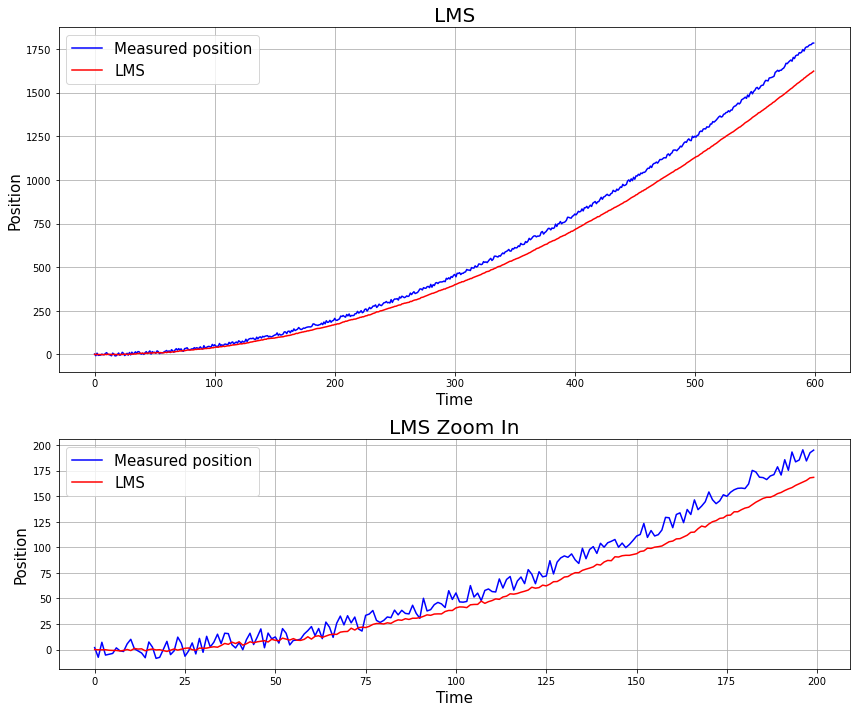

In [156]:
# Implementation of LMS
# x_train = data[0:300]
u = best_u
l = best_l
N = best_N

start_time_LMS = time.time() # Start timer to measure execution time

y,wn = lmsPred(x_train,l,u,N)

end_time_LMS = time.time() # Save the end time
execution_time_LMS = end_time_LMS - start_time_LMS # Find the execution time

y = y.reshape(600,)

# Plot results - Let look at the original Data and LMS output
plot_data_lms(x_train, y)

In [157]:
# Smooth the data using Savitzky-Golay filter
window_length = 21  # Window length of the filter
polyorder = 1  # Order of the polynomial used to fit the samples
x_hat_smooth_LMS = savgol_filter(y, window_length, polyorder)

### Final plot. Here I demonstrate the performance of  Kalman Filter vs LMS vs Real Position

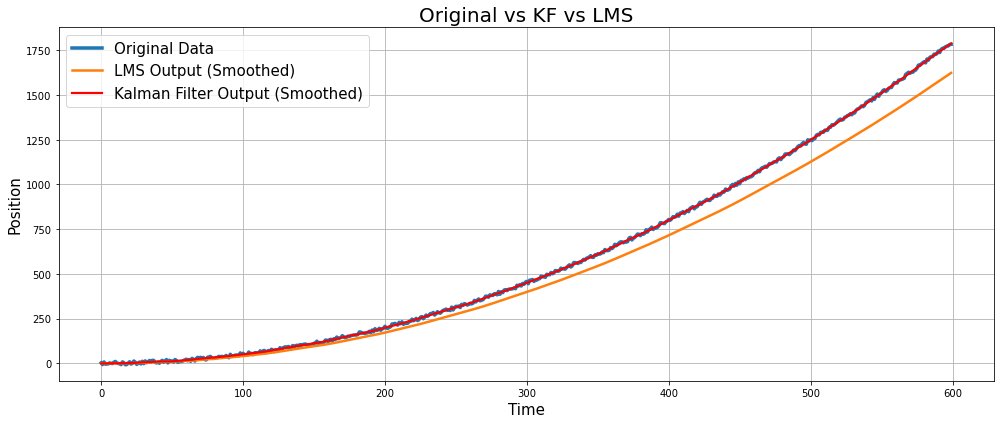

In [158]:
# Plot the smoothed data
plt.figure(figsize=(14,6))
t = np.arange(len(data))
plt.plot(t, data, label='Original Data', linewidth = 3.5)
plt.plot(t, x_hat_smooth_LMS, label='LMS Output (Smoothed)', linewidth = 2.5)
plt.plot(t, x_hat_smooth_KM, label='Kalman Filter Output (Smoothed)', color = "red", linewidth = 2.2)
plt.title("Original vs KF vs LMS", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Position', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Comparison of the Erros.

In [159]:
# Calculate RMSE and MAE
rmse_LMS = np.sqrt(np.mean((x_train - y)**2))
mae_LMS = np.mean(np.abs(x_train - y))

# Print the results

print("RMSE for LMS:", rmse_LMS)
print("MAE for LMS:", mae_LMS)
print("")
print("RMSE for Kalman Filter:", rmse_KM)
print("MAE for Kalman Filter:", mae_KM)

RMSE for LMS: 80.55157929316992
MAE for LMS: 63.108332897691845

RMSE for Kalman Filter: 0.732899775210399
MAE for Kalman Filter: 0.6023244642017495


### Plot Error, Learning Curve for LMS and KF.

In [160]:
def plot_learning_curve(x_train, y, title):
    mse = []
    n_samples = x_train.shape[0]
    for i in range(0, n_samples):
        y_pred = y[i]
        mse.append(abs(y_pred - x_train[i]))
    plt.figure(figsize=(12,4))
    plt.plot(mse)
    plt.title(f'{title}', fontsize=15)
    plt.xlabel('Number of Samples', fontsize=13)
    plt.ylabel('Mean Square Error', fontsize=13)
    plt.legend()
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


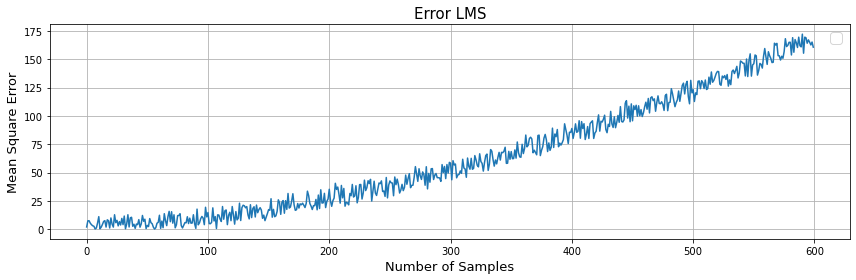

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


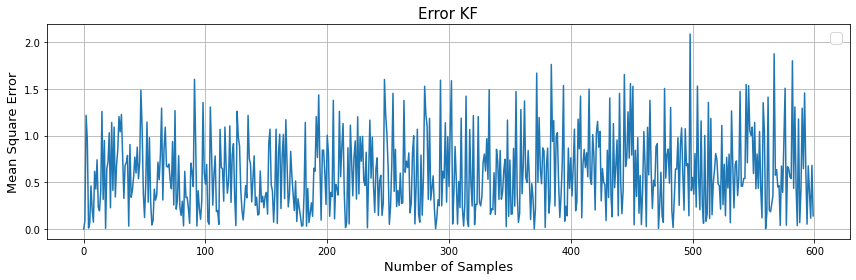

In [161]:
plot_learning_curve(x_train, y, "Error LMS")
plot_learning_curve(data, x_hat, "Error KF")

### Compare execution time

In [162]:
print("Execution time KF: ", execution_time_KF)
print("Execution time LMS: ", execution_time_LMS)

Execution time KF:  0.0012199878692626953
Execution time LMS:  0.0424189567565918


## <div align="center">Section 7. Conclusion</div>

In the end, here are some thoughts based on the onbservations of Kalman Filter and LMS:
1. Kalman Filter output much closer than the output of LMS.
2. Kalman Filter has smaller error and this error does not grow within the time.
3. The output of Kalman Filter remainds the same and it does not matter if I restart the process, whereas every time when I restart Jupyter Notebook LMS algorithm give different graphs and errors. Moreover, the RMSE can go to 275.
4. According to the execution time KF 3.5 times faster than LMS.